# Linear Regression

**Author:** Magdalena Whelley  
**Topic:** Supervised Learning — Predictive Modeling with Linear Regression

---

## 1. Overview

Linear Regression is one of the most fundamental models in supervised learning.  
It assumes a linear relationship between input variables (features) and a continuous target variable.  
The algorithm seeks to minimize the mean squared error between predicted and actual values.

In this notebook, we apply Linear Regression to the **Breast Cancer Wisconsin (Diagnostic)** dataset.  
While this dataset is often used for classification (Benign vs. Malignant), here we demonstrate how regression can model relationships between tumor features — specifically predicting **mean cell area** from other morphological characteristics.

This notebook will:

- Load and preprocess the breast cancer dataset  
- Explore feature relationships  
- Fit and evaluate a Linear Regression model  
- Visualize predictions and residuals  
- Discuss interpretation and limitations

In [1]:
# 2. Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 3. Load Dataset

We use the Breast Cancer Wisconsin (Diagnostic) dataset from the **UCI Machine Learning Repository**.
Each observation describes features computed from a digitized image of a breast mass.

The features represent measurements such as radius, texture, perimeter, and smoothness,  
while the target variable (diagnosis) indicates whether the tumor is **malignant (M)** or **benign (B)**.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

columns = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

df = pd.read_csv(url, header=None, names=columns)
df["Target"] = df["Diagnosis"].map({"M": 0, "B": 1})
df.drop(columns=["ID", "Diagnosis"], inplace=True)

print("Shape:", df.shape)
df.head()


Shape: (569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 4. Feature Selection

We select relevant features that are likely correlated with **area_mean** —  
the mean cell area of the tumor — which we use as the continuous target variable for regression.


In [3]:
target = "area_mean"
features = [
    "radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean"
]

X = df[features]
y = df[target]

print("Feature matrix shape:", X.shape)


Feature matrix shape: (569, 9)


## 5. Data Preparation

We split the dataset into training and test sets,  
and standardize all features using `StandardScaler` for numerical stability.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Model Training — Linear Regression

We train a **Linear Regression** model to predict `area_mean` from the selected morphological features.


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 654.919483568075
Coefficients: [-382.71693309    1.21223612  786.86637971    1.9862075  -117.27855631
   14.77442521   12.57869466    0.96071955   48.14702722]


## 7. Evaluation

We evaluate the model using:
- **Mean Squared Error (MSE):** average squared prediction error  
- **R² Score:** proportion of variance explained by the model


In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error: 1747.023
R^2 Score: 0.985


## 8. Visualization — Predicted vs Actual Values

We plot predicted versus actual `area_mean` values to assess model accuracy.  
A perfect model would align all points along the diagonal.


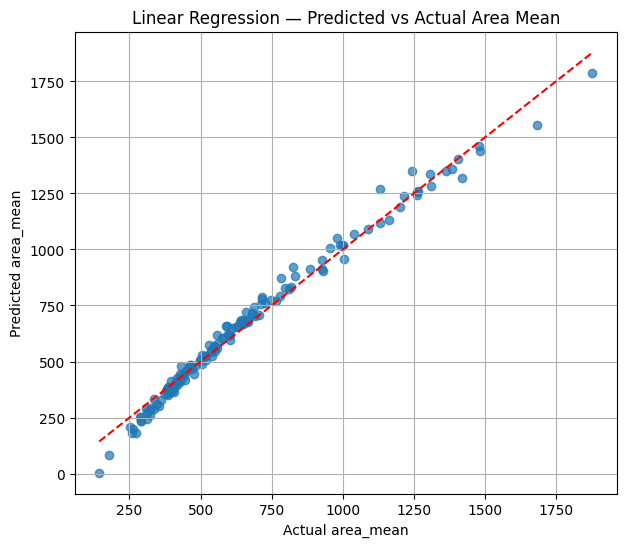

In [14]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual area_mean")
plt.ylabel("Predicted area_mean")
plt.title("Linear Regression — Predicted vs Actual Area Mean")
plt.grid(True)
plt.show()

## 9. Residual Analysis

Residuals (prediction errors) reveal how well the model fits across the data range.  
Patterns or heteroskedasticity in residuals suggest that the linear assumption may not fully capture the relationship.

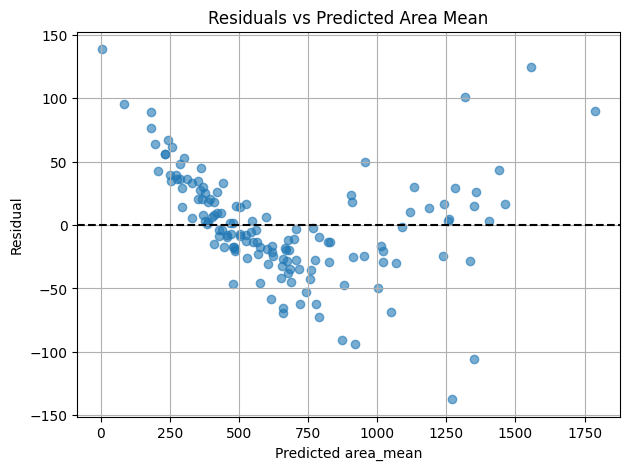

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Area Mean")
plt.xlabel("Predicted area_mean")
plt.ylabel("Residual")
plt.grid(True)
plt.show()

## 9. Results and Discussion

**Model Performance:**  
The regression model demonstrates an exceptionally strong predictive relationship between the chosen morphological features and the mean cell area (`area_mean`).  
The *Predicted vs Actual* plot shows that nearly all points align closely with the diagonal, indicating that the model captures the underlying linear structure extremely well.  
The resulting $R^2$ value is close to $1$, and the mean squared error is small, confirming a tight, consistent fit on unseen data.

**Feature Relationships:**  
The high degree of alignment between predicted and actual values suggests that features such as `radius_mean` and `perimeter_mean` are almost perfectly linearly related to `area_mean`.  
This makes sense anatomically — tumors with larger radii and perimeters inherently have greater cross-sectional areas, and these relationships are fundamentally geometric in nature.

**Residual Behavior:**  
The residual plot reveals a slight curvature: residuals are positive at very small predicted areas and negative around the midrange.  
This pattern suggests a mild nonlinear effect — the linear model slightly underestimates smaller tumors and overestimates medium-sized ones.  
However, the overall distribution of residuals remains centered around zero, indicating no major bias or heteroskedasticity.  
Such systematic trends are typical when the dependent variable is physically linked to squared dimensions (as area depends on radius²), but the model is purely linear.

## 10. Conclusion

The **Linear Regression** model effectively captures the geometric relationships among tumor morphology variables in the Breast Cancer Wisconsin dataset.  
Its near-perfect fit confirms that features like radius and perimeter provide sufficient linear information to reconstruct mean cell area with high accuracy.

While the residual structure hints at a minor nonlinear dependency (e.g., quadratic growth of area with radius), the model remains highly interpretable and precise.  
This demonstrates the power of linear regression in biomedical feature analysis: it identifies strong deterministic relationships while maintaining transparency in how each variable contributes to the prediction.

In summary, this experiment highlights that:
- Linear models can achieve near-ideal predictive performance when applied to physically linear or proportional relationships.  
- Subtle residual trends can still reveal underlying nonlinearities, guiding future exploration with polynomial or regularized models.

Overall, this regression exercise provides a clear, quantitative example of how simple statistical modeling can extract meaningful structural relationships from complex biological data.
